# **GPU Test**

In [ ]:
!nvidia-smi

Sun May 19 09:00:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              48W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# **Connect Google Drive to Google Colab**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Download Data**

Dataset: https://universe.roboflow.com/microsoft/coco/dataset/18
Download it then unzip it

In [9]:
!unzip '/content/drive/MyDrive/Capstone/COCO-Dataset.v18-yolov9-c-1280-gelan-.yolov8.zip'

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: valid/labels/000000456142_jpg.rf.c978f6c90d4e4ba4b8bfdf2d9a0c9bec.txt  
 extracting: valid/labels/000000456143_jpg.rf.5e0dfccc6d77766ff230156c6e367d9f.txt  
 extracting: valid/labels/000000456146_jpg.rf.9caa881813a295c0eb19a4928d589b64.txt  
 extracting: valid/labels/000000456197_jpg.rf.af003821a34bba9c71ad3ba564551765.txt  
 extracting: valid/labels/000000456217_jpg.rf.5f0b45156cf004958bf3fdf139bc8c79.txt  
 extracting: valid/labels/000000456248_jpg.rf.aed54c93849555c149ce9fdf5ea86d6c.txt  
 extracting: valid/labels/000000456251_jpg.rf.5e51daa9d90b6fad81da53e65ecba151.txt  
 extracting: valid/labels/000000456261_jpg.rf.c630283dbfd705be9e59da1400c6fb10.txt  
 extracting: valid/labels/000000456285_jpg.rf.a4f4204d1bf0c2c462b711e509a9dc86.txt  
 extracting: valid/labels/000000456292_jpg.rf.1901c3a552c30f2d1c166c1f9a9f141b.txt  
 extracting: valid/labels/000000456303_jpg.rf.e6874e480bf41ae24b69b1c81beabad9.txt  
 extracting: valid

# **Connect with MLFlow**

In [10]:
!pip install mlflow
!pip install pyngrok
!pip install ultralytics

In [11]:
from ultralytics import settings

# Update a setting
settings.update({'mlflow': True})

# Reset settings to default values
settings.reset()

# **YOLOv8**

In [12]:
from ultralytics import YOLO

In [13]:
#Check if yolo works
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 27.4MB/s]
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 78.5MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 135.3ms
Speed: 15.0ms preprocess, 135.3ms inference, 2644.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
#Train yolo on your dataset
!yolo task=detect mode=train model=yolov8l.pt data=../content/data.yaml epochs=20 imgsz=640

100% 83.7M/83.7M [00:00<00:00, 431MB/s]
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=../content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

# **Hyperparameter Tuning**

In [ ]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO('/content/runs/detect/train44/weights/best.pt')

# Tune hyperparameters
model.tune(data='data.yaml', epochs=10, iterations=100, optimizer='AdamW', save=False, plots=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune7'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/100 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


# **Model Rsults with MLFlow**

In [18]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

**Make an account on dashboard.ngrok to provide the authtoken to access MLFlow**

In [21]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········
 * ngrok tunnel "https://6823-34-126-156-143.ngrok-free.app" -> "http://127.0.0.1:5000"


In [22]:
#run this cell then click on the above link
!mlflow server --backend-store-uri 'runs/mlflow'

[2024-05-19 18:16:43 +0000] [153258] [INFO] Starting gunicorn 22.0.0
[2024-05-19 18:16:43 +0000] [153258] [INFO] Listening at: http://127.0.0.1:5000 (153258)
[2024-05-19 18:16:43 +0000] [153258] [INFO] Using worker: sync
[2024-05-19 18:16:43 +0000] [153263] [INFO] Booting worker with pid: 153263
[2024-05-19 18:16:43 +0000] [153264] [INFO] Booting worker with pid: 153264
[2024-05-19 18:16:43 +0000] [153265] [INFO] Booting worker with pid: 153265
[2024-05-19 18:16:43 +0000] [153266] [INFO] Booting worker with pid: 153266
[2024-05-19 18:32:47 +0000] [153258] [INFO] Handling signal: int

Aborted!
[2024-05-19 18:32:47 +0000] [153266] [INFO] Worker exiting (pid: 153266)
[2024-05-19 18:32:47 +0000] [153264] [INFO] Worker exiting (pid: 153264)
[2024-05-19 18:32:47 +0000] [153263] [INFO] Worker exiting (pid: 153263)
[2024-05-19 18:32:47 +0000] [153265] [INFO] Worker exiting (pid: 153265)
[2024-05-19 18:32:48 +0000] [153258] [INFO] Shutting down: Master


# **Test Model on Testset**

In [24]:
!yolo detect val model=/content/runs/detect/train44/weights/best.pt data=data.yaml split=test

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs
val: Scanning /content/test/labels... 11631 images, 96 backgrounds, 0 corrupt: 100% 11631/11631 [00:12<00:00, 924.28it/s]
val: New cache created: /content/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 727/727 [01:43<00:00,  7.01it/s]
                   all      11631      87036      0.703      0.583      0.641      0.474
              airplane      11631        530      0.854      0.774       0.84       0.63
                 apple      11631        637       0.55      0.284       0.33      0.249
              backpack      11631        955      0.622      0.307      0.377      0.206
                banana      11631        778      0.582      0.406      0.458      0.316
          baseball bat      11631        312      0.699      0.625      

# **Test on Random Image**

In [30]:
!yolo predict model=/content/runs/detect/train44/weights/best.pt source=/content/pic.jpg

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 /content/pic.jpg: 448x640 12 cars, 3 handbags, 11 persons, 142.2ms
Speed: 6.6ms preprocess, 142.2ms inference, 1974.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


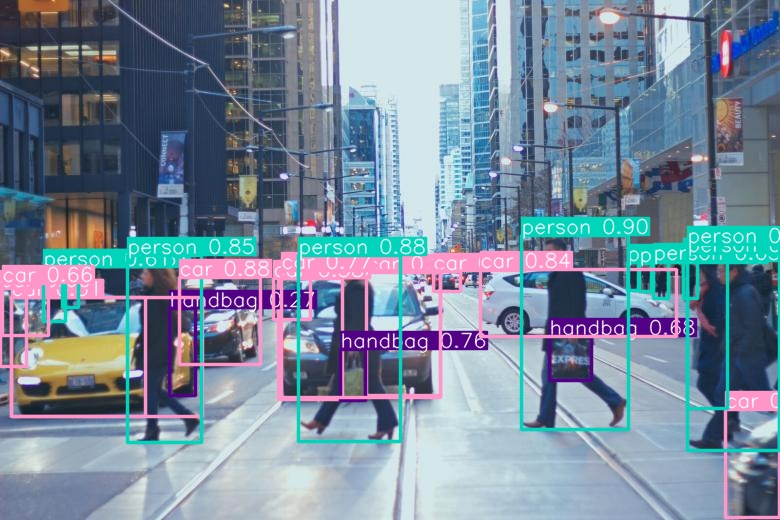

In [32]:
from IPython.display import Image
Image(filename="/content/runs/detect/predict2/pic.jpg", width=600)

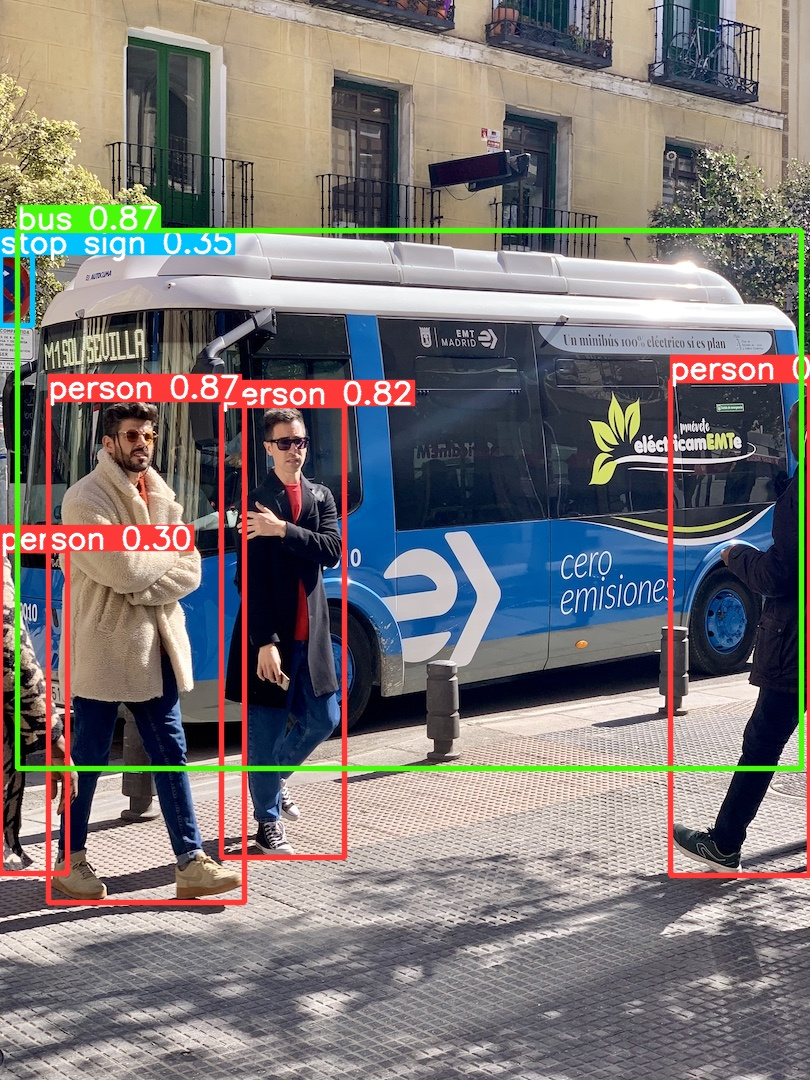

In [35]:
from IPython.display import Image
Image(filename="/content/runs/detect/predict/bus.jpg", width=600)